# Histogramas

En esta oportunidad, aprenderemos a visualizar como los datos estan distribuidos en nuestra base de datos. Para esto, usaremos histogramas y esta configurado por defecto en $\texttt{displot()}$.

In [ ]:
import seaborn as sns

Dataset: **penguins**

In [ ]:
penguins = sns.load_dataset("penguins")
penguins_1 = penguins[penguins["flipper_length_mm"] <= 200 and penguins["flipper_length_mm"]>=180]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Detectar todos los valores $\texttt{NaN}$

In [ ]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Llenamos estos valores con la *moda* en cada columna.

In [ ]:
penguins.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
penguins.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male


In [ ]:
type(penguins.mode())

pandas.core.frame.DataFrame

In [ ]:
penguins.mode().iloc[0]

species              Adelie
island               Biscoe
bill_length_mm         41.1
bill_depth_mm          17.0
flipper_length_mm     190.0
body_mass_g          3800.0
sex                    Male
Name: 0, dtype: object

In [ ]:
penguins = penguins.fillna(penguins.mode().iloc[0])

In [ ]:
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins

Realizamos la visualización del histograma

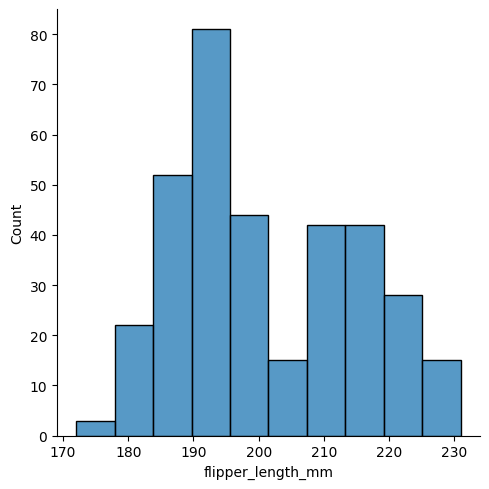

In [ ]:
sns.displot(penguins, x="flipper_length_mm")

In [ ]:
df = penguins[penguins["species"]=="Adelie"]

**¿Que podemos decir del tamaño de las aletas?**

## Cambiar el ancho de las barras (*bin*)

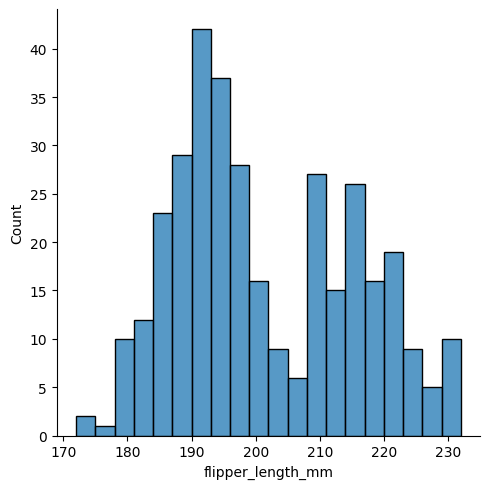

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

Podemos indicar directamente cuantas barras queremos ver

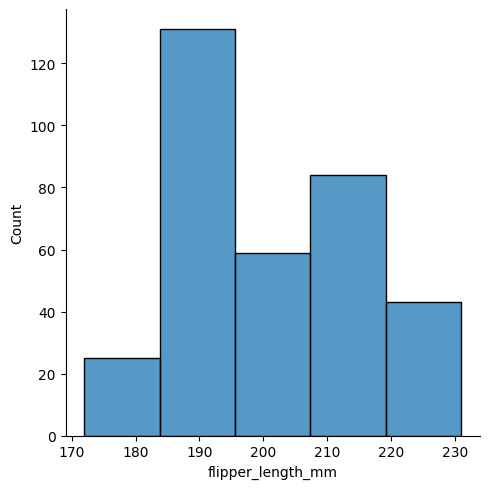

In [ ]:
sns.displot(penguins, x="flipper_length_mm", bins=5)

Hay ococaciones en las cuales configurar el ancho de la barra es necesario

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


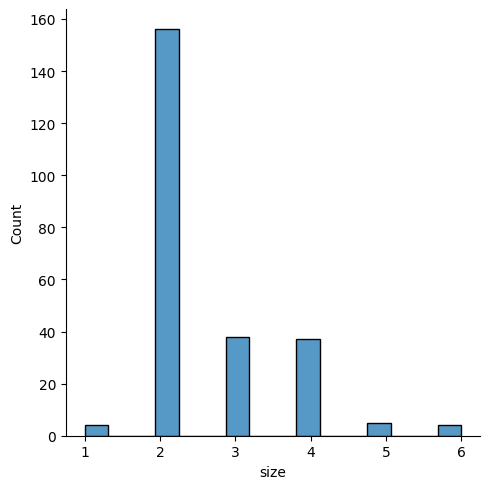

In [ ]:
sns.displot(tips, x="size")

Para solucionar este problema, podemos especificar las barras.

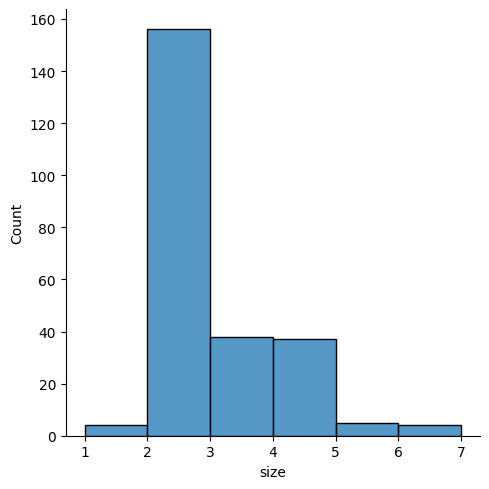

In [ ]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

O podemos indicar que la variable es discreta

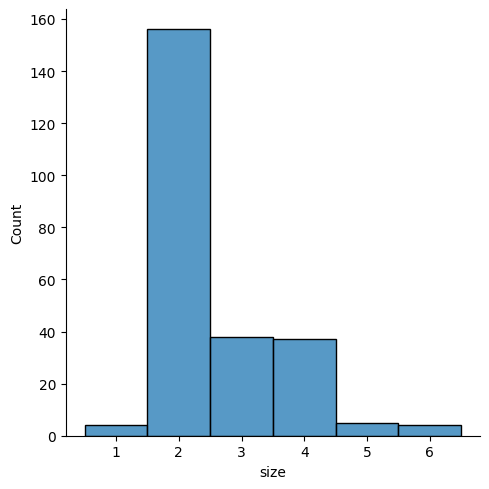

In [ ]:
sns.displot(tips, x="size", discrete=True)

## ¿Como se diferencia esta variable con respecto a otra?

En ocaciones podría ser necesario visualizar el comportamiento de una variable con respecto a otra. En Seaborn podemos realizar este proceso modificando el color.

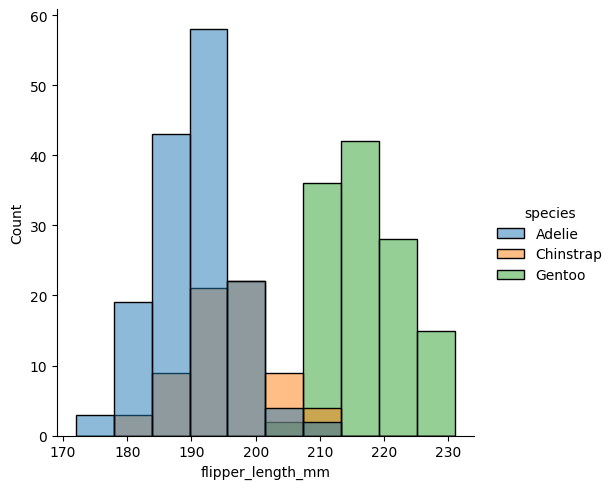

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

Tal vez sea un poco difícil distinguir entre los tres colores. Para resolver este problema podemos apilar las barras.

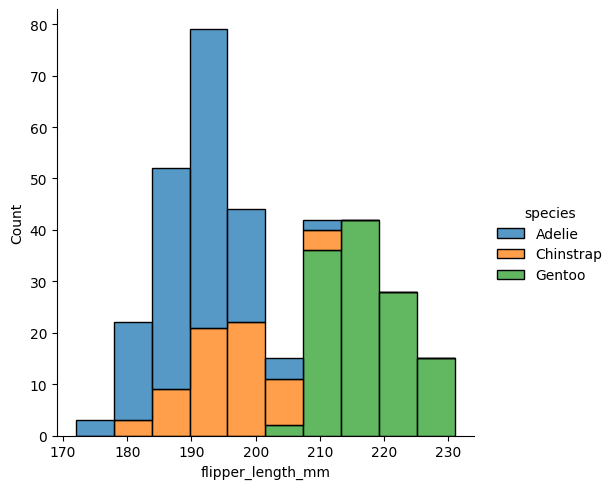

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

Tambien podemos colocarlos uno al costado del otro.

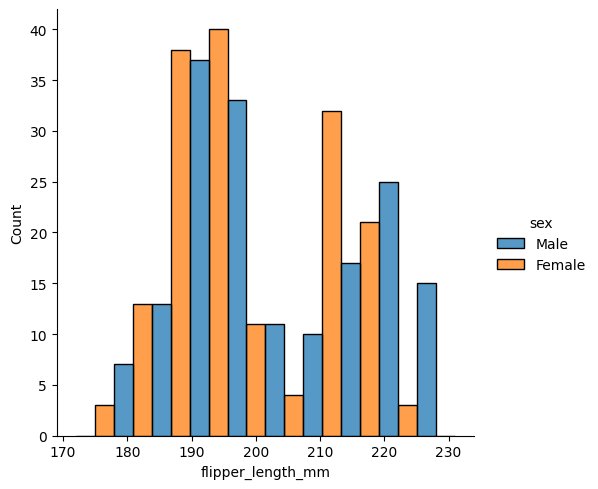

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

Por último, podemos realizar dos gráficos.

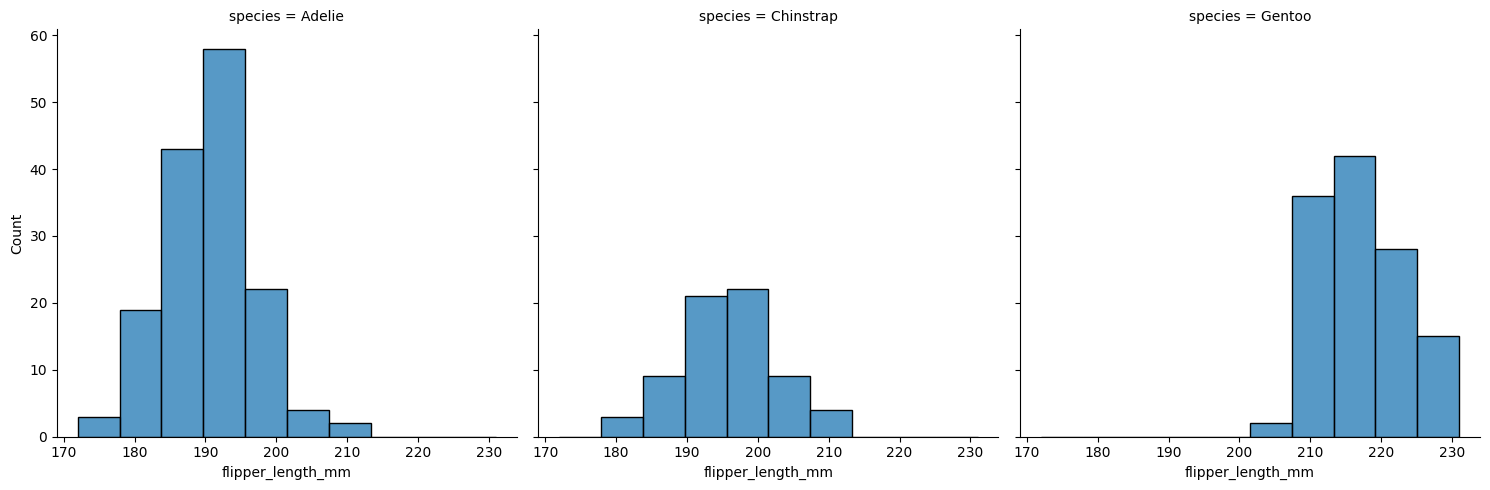

In [ ]:
sns.displot(penguins, x="flipper_length_mm", col="species")

O podemos cambiar la visualización

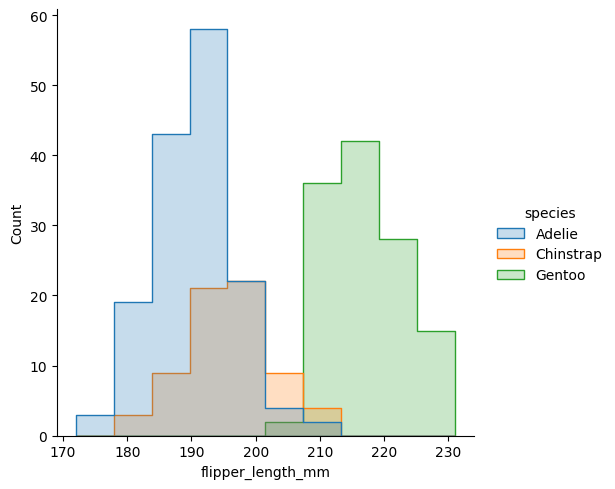

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")